In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Đọc dữ liệu từ file csv
df = pd.read_excel('data/mysales.xlsx')
df.head(10)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
5,24847,Medium,0.05,3.28,4.20,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-37.0300,4,13.99,86838
6,24848,Medium,0.05,3.58,1.63,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-0.7100,4,14.26,86838
7,18181,Critical,0.00,4.42,4.99,15,Timothy Reese,Regular Air,Small Business,Office Supplies,...,East,New York,Smithtown,11787,2015-04-08,2015-04-09,-59.8200,7,33.47,86837
8,20925,Medium,0.01,35.94,6.66,15,Timothy Reese,Regular Air,Small Business,Office Supplies,...,East,New York,Smithtown,11787,2015-05-28,2015-05-28,261.8757,10,379.53,86839
9,26267,High,0.04,2.98,1.58,16,Sarah Ramsey,Regular Air,Small Business,Office Supplies,...,East,New York,Syracuse,13210,2015-02-12,2015-02-15,2.6300,6,18.80,86836


In [8]:
# Xem kích thước của dữ liệu
shape = df.shape
print("Kích thước dữ liệu:", shape)

Kích thước dữ liệu: (1952, 25)


In [9]:
# Kiểm tra giá trị thiếu
print("Số lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

Số lượng giá trị thiếu trong mỗi cột:
Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64


In [10]:
# Đổi tên các cột
df.rename(columns={'Order Priority': 'Priority',
                   'Ship Mode': 'Mode',
                   'Unit Price': 'Price',
                   'Shipping Cost': 'ShipCost',
                   'Quantity ordered new': 'Quantity'}, inplace=True)

# Hiển thị kết quả tại index 20
result_at_index_20 = df.loc[20]
print(result_at_index_20)

Row ID                                                    23612
Priority                                                   High
Discount                                                   0.01
Price                                                     17.98
ShipCost                                                   8.51
Customer ID                                                  32
Customer Name                                    Matthew Berman
Mode                                                Regular Air
Customer Segment                                      Corporate
Product Category                                     Technology
Product Sub-Category                            Office Machines
Product Container                                    Medium Box
Product Name            Canon P1-DHIII Palm Printing Calculator
Product Base Margin                                         0.4
Country                                           United States
Region                                  

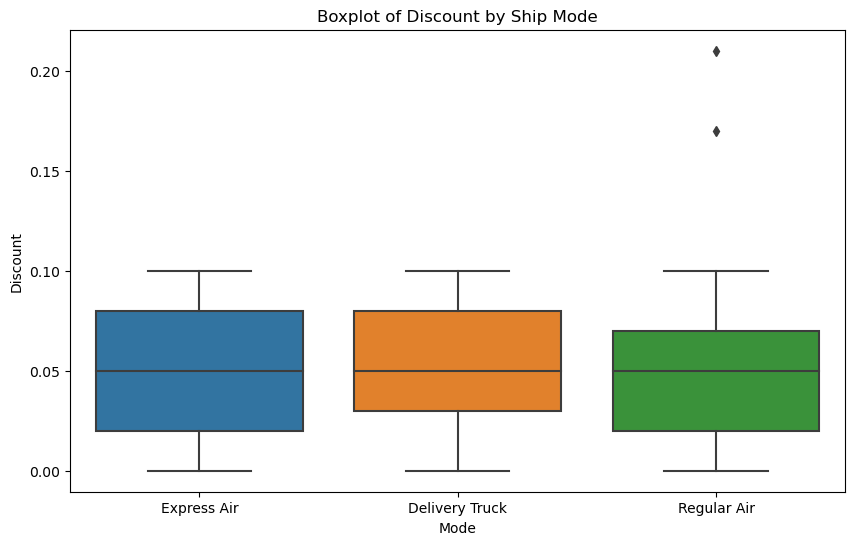

Nhóm có khoảng giá trị lớn nhất là 'Regular Air' với giá trị lớn nhất là 0.21


In [23]:
# Vẽ boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mode', y='Discount', data=df)
plt.title('Boxplot of Discount by Ship Mode')
plt.show()

# Xác định khoảng giá trị lớn nhất
max_range_ship_mode = df.groupby('Mode')['Discount'].max().idxmax()
max_range_value = df.groupby('Mode')['Discount'].max().max()

# In kết quả
print(f"Nhóm có khoảng giá trị lớn nhất là '{max_range_ship_mode}' với giá trị lớn nhất là {max_range_value}")

# Kiểm tra liệu Ship Mode có giúp dự báo giá trị Discount hay không
# Bạn có thể sử dụng các phương tiện thống kê như ANOVA hoặc kiểm định t tùy thuộc vào yêu cầu cụ thể của bạn.

In [25]:
from scipy.stats import f_oneway

# Giả sử df là DataFrame chứa dữ liệu của bạn
# df có thể chứa các cột như 'Discount' và 'Ship Mode'

# Tạo các nhóm dựa trên 'Ship Mode'
ship_mode_groups = [df['Discount'][df['Mode'] == mode] for mode in df['Mode'].unique()]

# Kiểm định ANOVA
f_statistic, p_value = f_oneway(*ship_mode_groups)

# In kết quả
print(f"Giá trị F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Kiểm tra giả định về phương sai đồng nhất
# Nếu p-value < alpha (thường là 0.05), ta có thể bác bỏ giả định

# So sánh với một ngưỡng alpha (thường là 0.05)
alpha = 0.05
if p_value < alpha:
    print("Có sự khác biệt có ý nghĩa giữa các nhóm, bác bỏ giả định H0.")
else:
    print("Không có đủ bằng chứng để bác bỏ giả định H0, không có sự khác biệt có ý nghĩa giữa các nhóm.")


Giá trị F-statistic: 2.451650194735515
P-value: 0.0864169516551636
Không có đủ bằng chứng để bác bỏ giả định H0, không có sự khác biệt có ý nghĩa giữa các nhóm.


In [30]:
# Xử lý loại bỏ khoảng trắng thừa
df['Priority'] = df['Priority'].str.strip()

# Kiểm tra xem có khoảng trắng thừa nào không
print(df['Priority'].unique())

KeyError: 'Priority'

In [ ]:
# Xử lý loại bỏ khoảng trắng thừa
df['Priority'] = df['Priority'].str.strip()

# Kiểm tra xem có khoảng trắng thừa nào không
print(df['Priority'].unique())

# Tiếp theo, bạn có thể mã hóa biến Priority bằng phương pháp nào đó
# Ví dụ, sử dụng Label Encoding hoặc One-Hot Encoding

# Ví dụ về Label Encoding
priority_mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df['Priority_LabelEncoded'] = df['Priority'].map(priority_mapping)

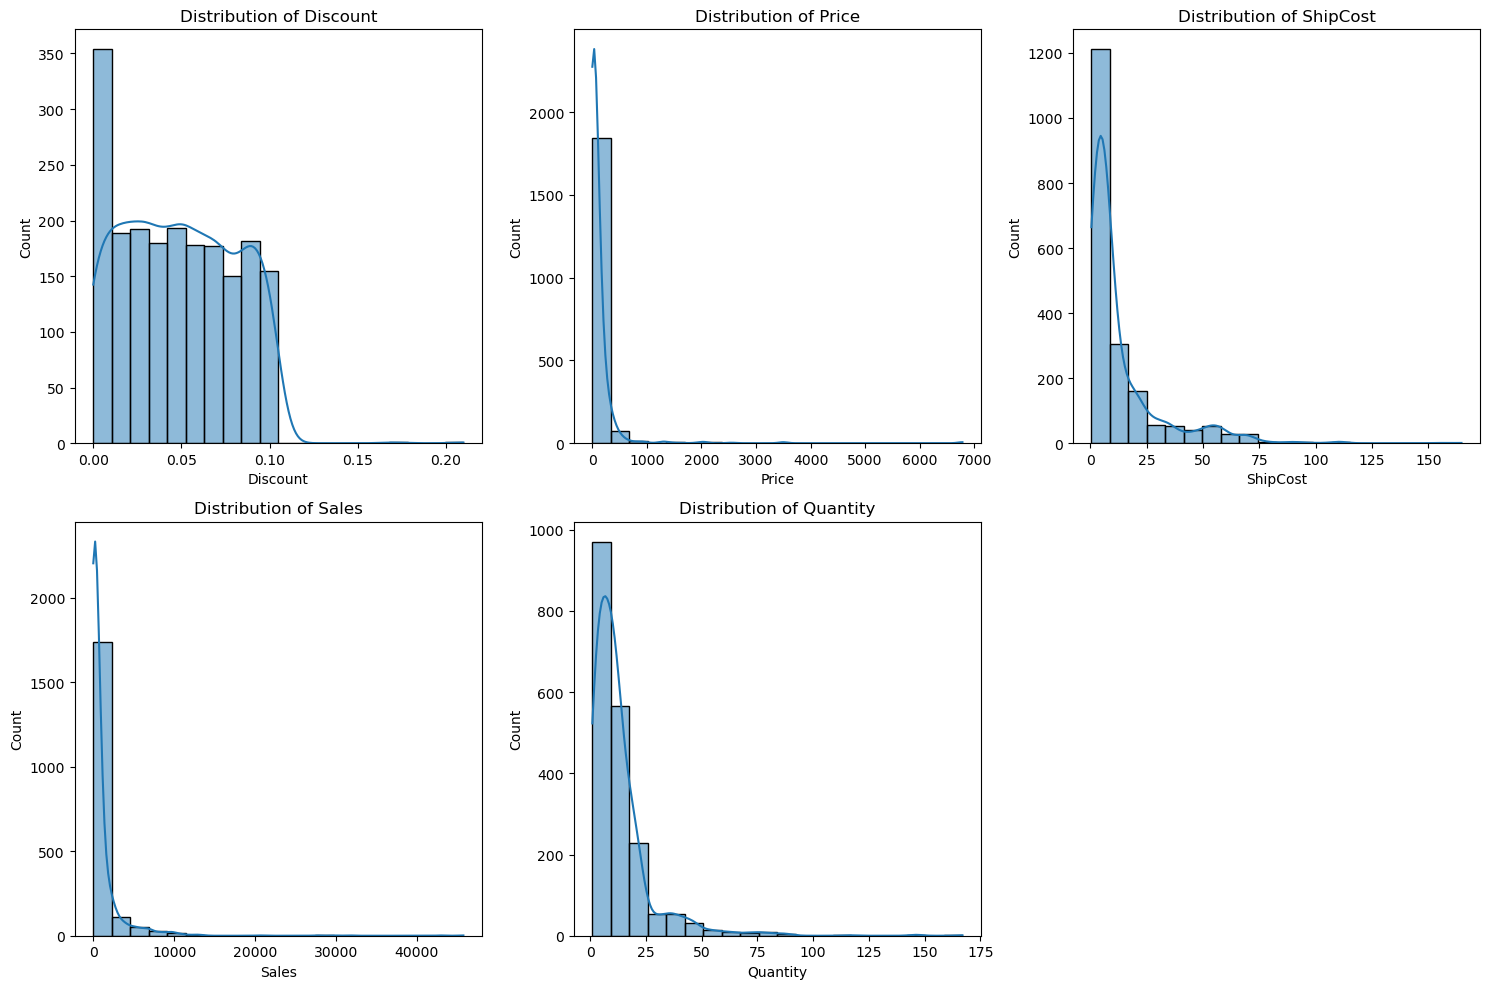

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử df là DataFrame chứa dữ liệu của bạn
# df có thể chứa các cột như 'Discount', 'Price', 'ShipCost', 'Sales', 'Quantity'

# Tạo một subplot với 2 hàng và 3 cột
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Biến "Discount"
sns.histplot(df['Discount'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Discount')

# Biến "Price"
sns.histplot(df['Price'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Price')

# Biến "ShipCost"
sns.histplot(df['ShipCost'], bins=20, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of ShipCost')

# Biến "Sales"
sns.histplot(df['Sales'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sales')

# Biến "Quantity"
sns.histplot(df['Quantity'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Quantity')

# Hủy bỏ subplot cuối cùng
fig.delaxes(axes[1, 2])

# Hiển thị đồ thị
plt.tight_layout()
plt.show()


In [34]:
from scipy.stats import probplot

# Giả sử df là DataFrame chứa dữ liệu của bạn
# df có thể chứa các cột như 'Discount', 'Price', 'ShipCost', 'Quantity', 'Sales'

# List các biến số cần kiểm tra
variables_to_check = ['Discount', 'Price', 'ShipCost', 'Quantity', 'Sales']

for variable in variables_to_check:
    _, (_, _, r) = probplot(df[variable], fit=True)
    print(f'R-squared for {variable}: {r**2:.4f}')


R-squared for Discount: 0.9443
R-squared for Price: 0.2167
R-squared for ShipCost: 0.6630
R-squared for Quantity: 0.6808
R-squared for Sales: 0.3642


In [35]:
from scipy.stats import skew

# Giả sử df là DataFrame chứa dữ liệu của bạn
# df có thể chứa các cột như 'Discount', 'Price', 'ShipCost', 'Quantity', 'Sales'

# List các biến số cần kiểm tra
variables_to_check = ['Discount', 'Price', 'ShipCost', 'Quantity', 'Sales']

max_skewness = 0  # Giữ track giá trị độ lệch lớn nhất
max_skew_variable = None  # Biến số có độ lệch lớn nhất

for variable in variables_to_check:
    skewness = skew(df[variable])
    print(f'Skewness for {variable}: {skewness:.4f}')

    # Cập nhật biến có độ lệch lớn nhất
    if abs(skewness) > max_skewness:
        max_skewness = abs(skewness)
        max_skew_variable = variable

print(f'\nBiến số có độ lệch lớn nhất là {max_skew_variable} với giá trị độ lệch là {max_skewness:.4f}')


Skewness for Discount: 0.1460
Skewness for Price: 12.1301
Skewness for ShipCost: 2.7330
Skewness for Quantity: 3.6806
Skewness for Sales: 8.5471

Biến số có độ lệch lớn nhất là Price với giá trị độ lệch là 12.1301


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming df is the DataFrame containing your data
# df may have columns like 'Price', 'ShipCost', 'Quantity', 'Sales', 'Discount'

# Select input features
selected_features = ['Price', 'ShipCost', 'Quantity', 'Sales']

# Split the data into features (X) and target variable (y)
X = df[selected_features].values
y = df['Discount'].values

# Split the data into training and testing sets with a ratio of 80:20 and random state of 16
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Apply Z-Score normalization to the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model on the training data
y_train_pred = model.predict(X_train_scaled)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f'Root Mean Squared Error (RMSE) on training data: {train_rmse:.4f}')

# Print the coefficients and intercept of the model
print('\nModel Coefficients:')
for feature, coefficient in zip(selected_features, model.coef_):
    print(f'{feature}: {coefficient:.4f}')
print(f'Intercept (Bias): {model.intercept_:.4f}')

# Apply Z-Score normalization to the test set
X_test_scaled = scaler.transform(X_test)

# Evaluate the model on the test data
y_test_pred = model.predict(X_test_scaled)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f'\nRoot Mean Squared Error (RMSE) on testing data: {test_rmse:.4f}')

# View the skewness of the features
skewness = df[selected_features].skew()
print('\nSkewness of Features:')
for feature, skew_value in zip(selected_features, skewness):
    print(f'{feature}: {skew_value:.4f}')


Root Mean Squared Error (RMSE) on training data: 0.0313

Model Coefficients:
Price: 0.0005
ShipCost: 0.0019
Quantity: 0.0006
Sales: -0.0020
Intercept (Bias): 0.0491

Root Mean Squared Error (RMSE) on testing data: 0.0315

Skewness of Features:
Price: 12.1394
ShipCost: 2.7351
Quantity: 3.6834
Sales: 8.5537


In [38]:
skewness = df[selected_features].skew()
print('\nSkewness of Features (Correct Answer):')
for feature, skew_value in zip(selected_features, skewness):
    print(f'{feature}: {skew_value:.4f}')



Skewness of Features (Correct Answer):
Price: 12.1394
ShipCost: 2.7351
Quantity: 3.6834
Sales: 8.5537


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming df is the DataFrame containing your data
# df may have columns like 'Price', 'ShipCost', 'Quantity', 'Sales', 'Discount'

# Select input features
selected_features = ['Price', 'ShipCost', 'Quantity', 'Sales']

# Split the data into features (X) and target variable (y)
X = df[selected_features].values
y = df['Discount'].values

# Split the data into training and testing sets with a ratio of 80:20 and random state of 16
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Apply Z-Score normalization to the training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model on the training data
y_train_pred = model.predict(X_train_scaled)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f'Root Mean Squared Error (RMSE) on training data: {train_rmse:.4f}')

# Print the coefficients and intercept of the model
print('\nModel Coefficients:')
for feature, coefficient in zip(selected_features, model.coef_):
    print(f'{feature}: {coefficient:.4f}')
print(f'Intercept (Bias): {model.intercept_:.4f}')

# Apply Z-Score normalization to the test set
X_test_scaled = scaler.transform(X_test)

# Evaluate the model on the test data
y_test_pred = model.predict(X_test_scaled)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f'\nRoot Mean Squared Error (RMSE) on testing data: {test_rmse:.4f}')

# View the skewness of the features
skewness_train = pd.DataFrame(X_train_scaled, columns=selected_features).skew()
print('\nSkewness of Features (Training Data):')
for feature, skew_value in zip(selected_features, skewness_train):
    print(f'{feature}: {skew_value:.4f}')


Root Mean Squared Error (RMSE) on training data: 0.0313

Model Coefficients:
Price: 0.0005
ShipCost: 0.0019
Quantity: 0.0006
Sales: -0.0020
Intercept (Bias): 0.0491

Root Mean Squared Error (RMSE) on testing data: 0.0315

Skewness of Features (Training Data):
Price: 11.7247
ShipCost: 2.8147
Quantity: 3.8215
Sales: 8.4025


In [41]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kurtosis
import pandas as pd

# Assuming X_train_scaled is the Z-Score normalized data
# scaler is the StandardScaler object you've used before

# Apply Min-Max Scaling to the training set
scaler_minmax = MinMaxScaler()
X_train_minmax_scaled = scaler_minmax.fit_transform(X_train_scaled)

# View the kurtosis of the features
kurtosis_train_minmax = pd.DataFrame(X_train_minmax_scaled, columns=selected_features).kurtosis()
print('\nKurtosis of Features (Min-Max Scaled Training Data):')
for feature, kurtosis_value in zip(selected_features, kurtosis_train_minmax):
    print(f'{feature}: {kurtosis_value:.4f}')



Kurtosis of Features (Min-Max Scaled Training Data):
Price: 164.0384
ShipCost: 10.8416
Quantity: 23.8243
Sales: 109.7546


In [47]:
# Print the coefficients of the model
print('\nModel Coefficients (Ordered):')
coefficient_order = sorted(zip(selected_features, model.coef_), key=lambda x: abs(x[1]), reverse=True)
for feature, coefficient in coefficient_order:
    print(f'{feature}: {coefficient:.4f}')



Model Coefficients (Ordered):
Sales: -0.0020
ShipCost: 0.0019
Quantity: 0.0006
Price: 0.0005


In [50]:
from sklearn import metrics
import numpy as np

# Assuming model is your trained linear regression model
# X_train and y_train are the training features and labels

# Predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate and print the evaluation metrics
score = model.score(X_train, y_train)
mae = metrics.mean_absolute_error(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mape = metrics.mean_absolute_percentage_error(y_train, y_train_pred)

print('Score or R_Squared:', score)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)


Score or R_Squared: -28311.911094702635
Mean Absolute Error: 1.85322118555879
Mean Squared Error: 27.806185579894475
Root Mean Squared Error: 5.273157079008217
Mean Absolute Percentage Error: 624167023734370.4


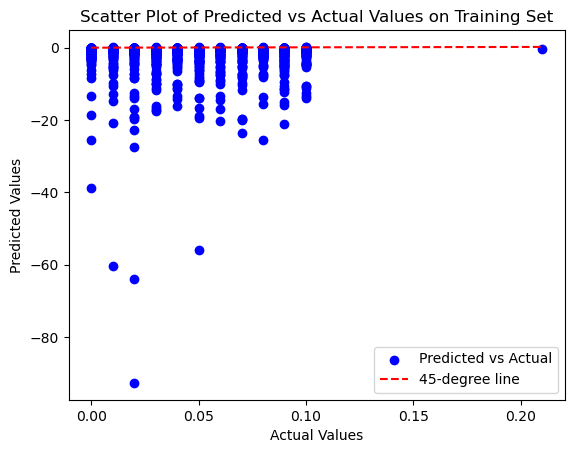

In [53]:
import matplotlib.pyplot as plt

# Assuming y_train and y_train_pred are your actual and predicted values on the training set
# y_train và y_train_pred là giá trị thực và dự báo trên tập huấn luyện

# Scatter plot between actual and predicted values
plt.scatter(y_train, y_train_pred, color='blue', label='Predicted vs Actual')

# Plotting the 45-degree line (y = x) for reference
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='45-degree line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values on Training Set')

# Displaying legend
plt.legend()

# Show the plot
plt.show()
